# Data scaling examples

## Load the data

In [5]:
import pandas as pd
# boston house-prices dataset
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['HouseValue'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


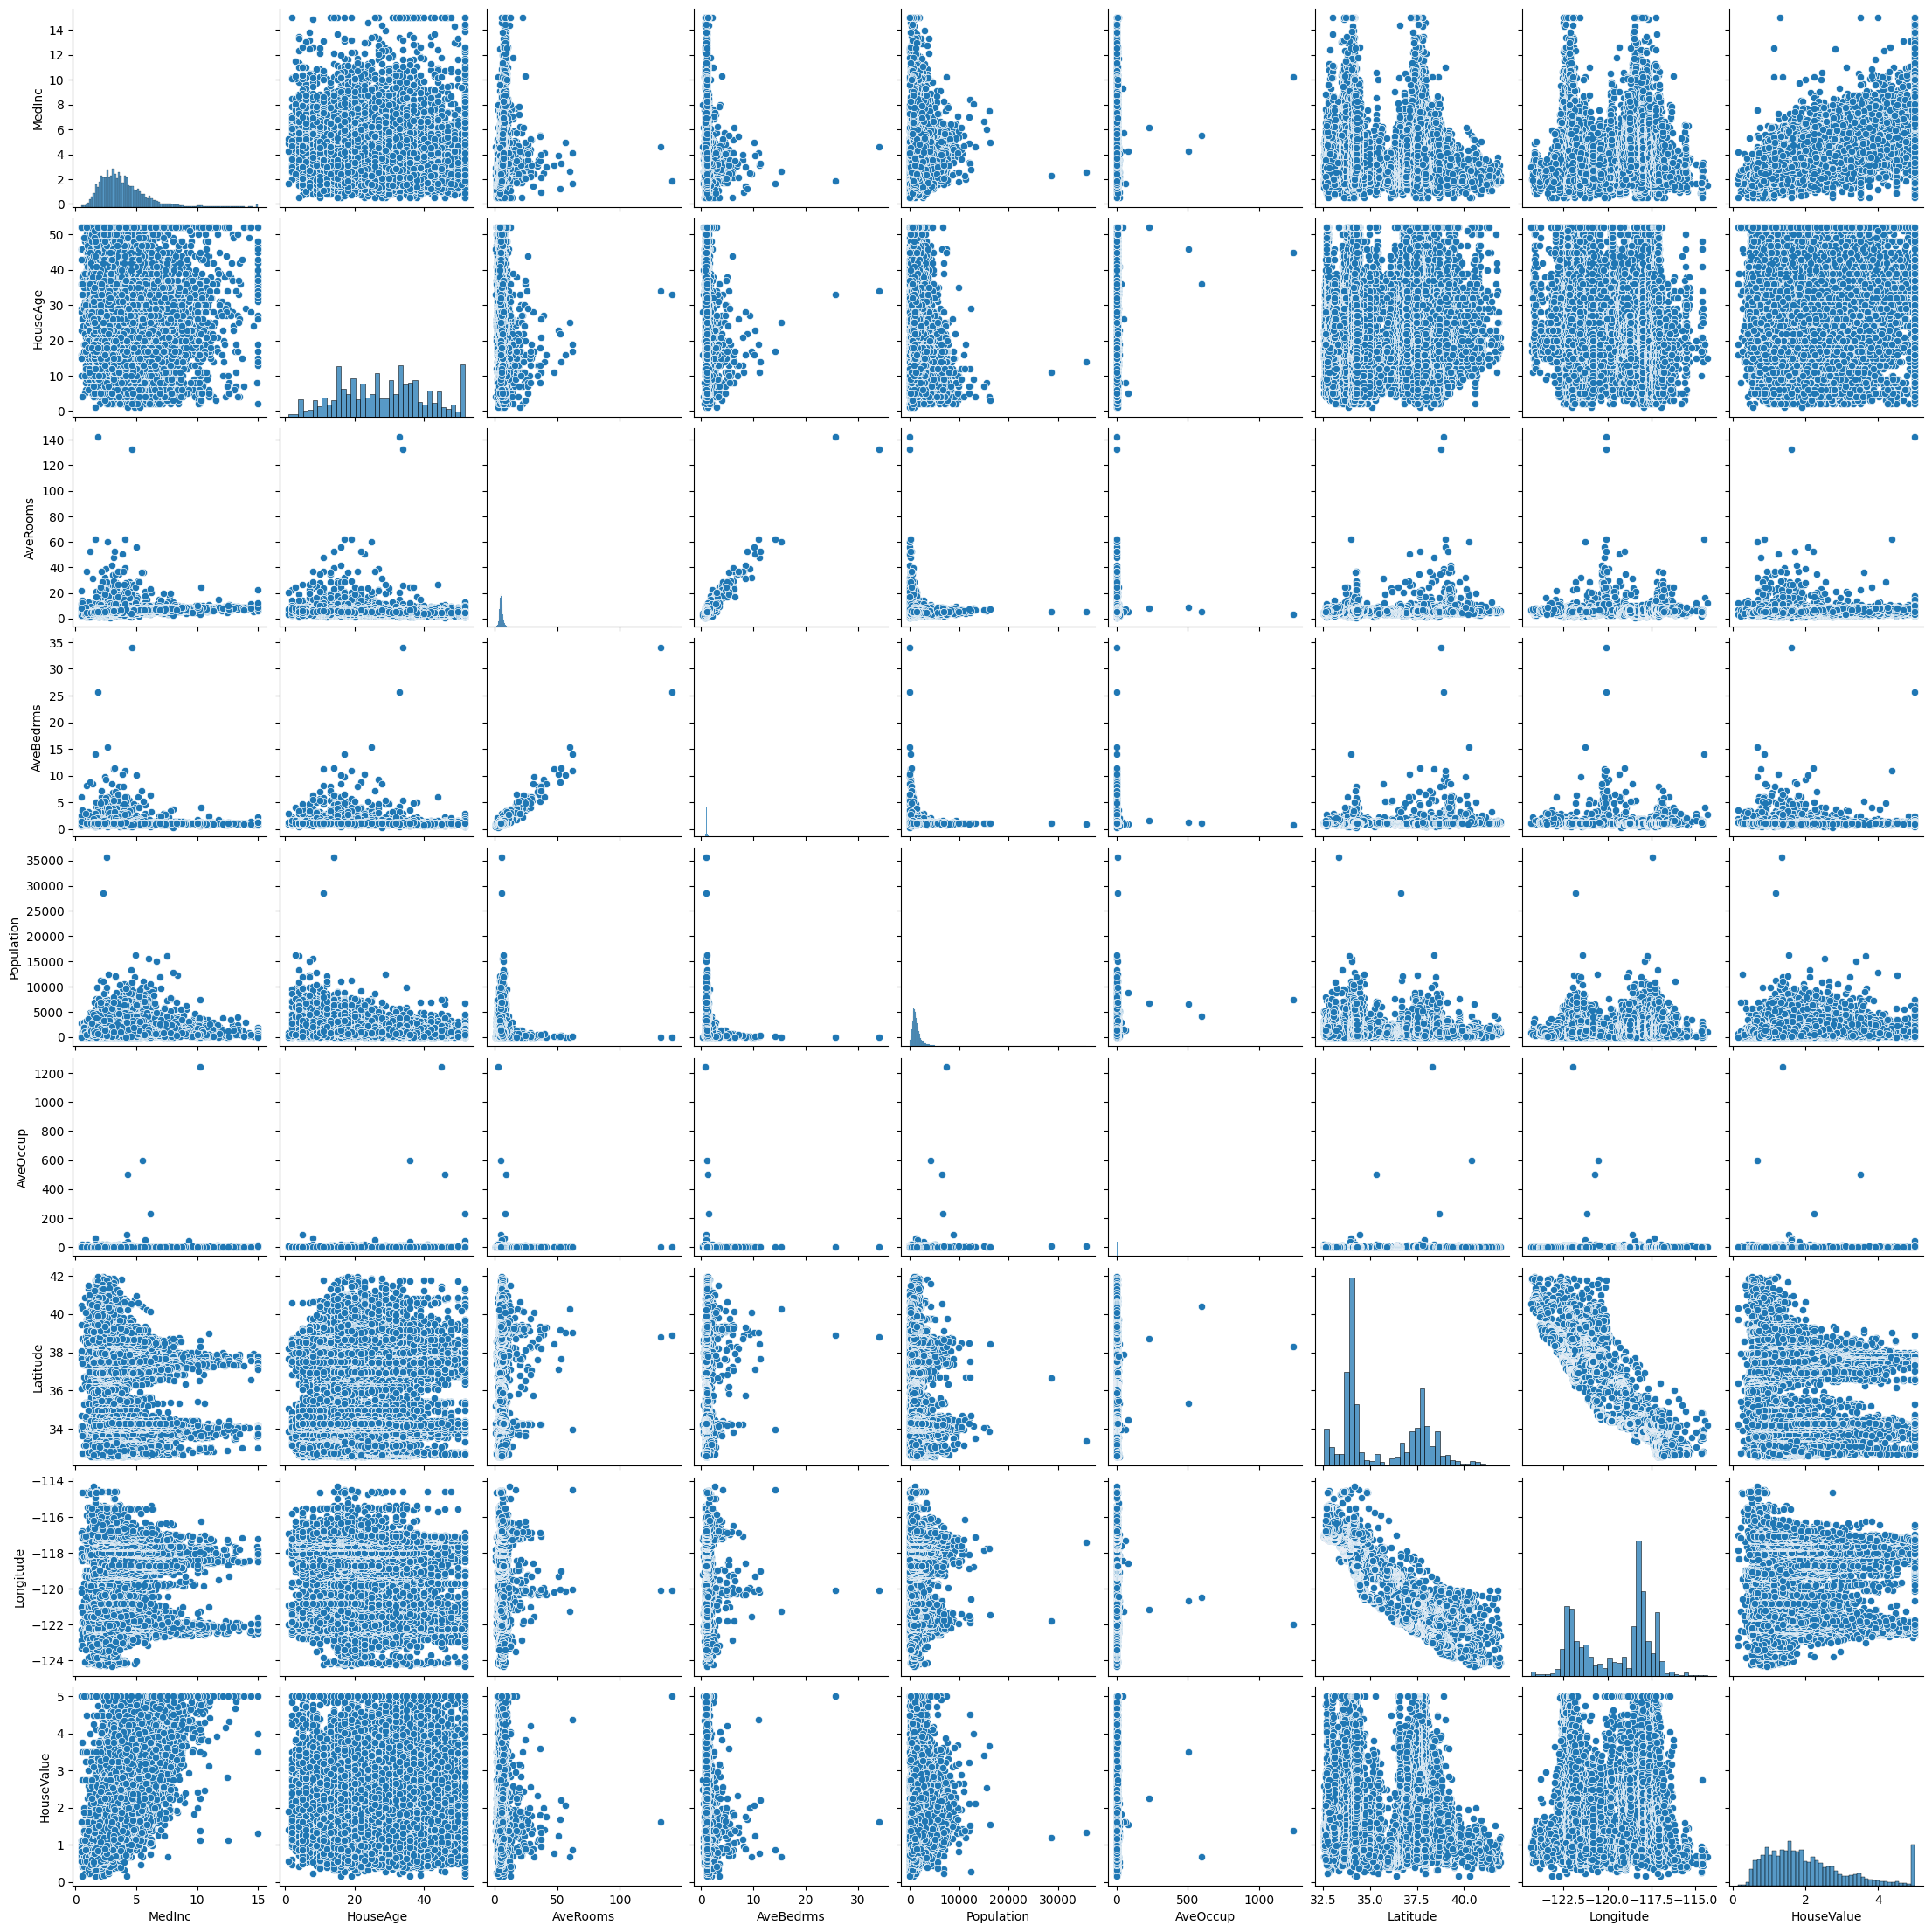

In [8]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(california_df)
plt.show()

In [6]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
california_df_scaled = scaler.fit_transform(california_df)
california_df_scaled = pd.DataFrame(california_df_scaled, columns=california_df.columns)
california_df_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


In [7]:
# mean and standard deviation
california_df_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15,2.037991e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00,-1.662641e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00,-7.561633e-01
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01,-2.353337e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01,5.014973e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00,2.540411e+00


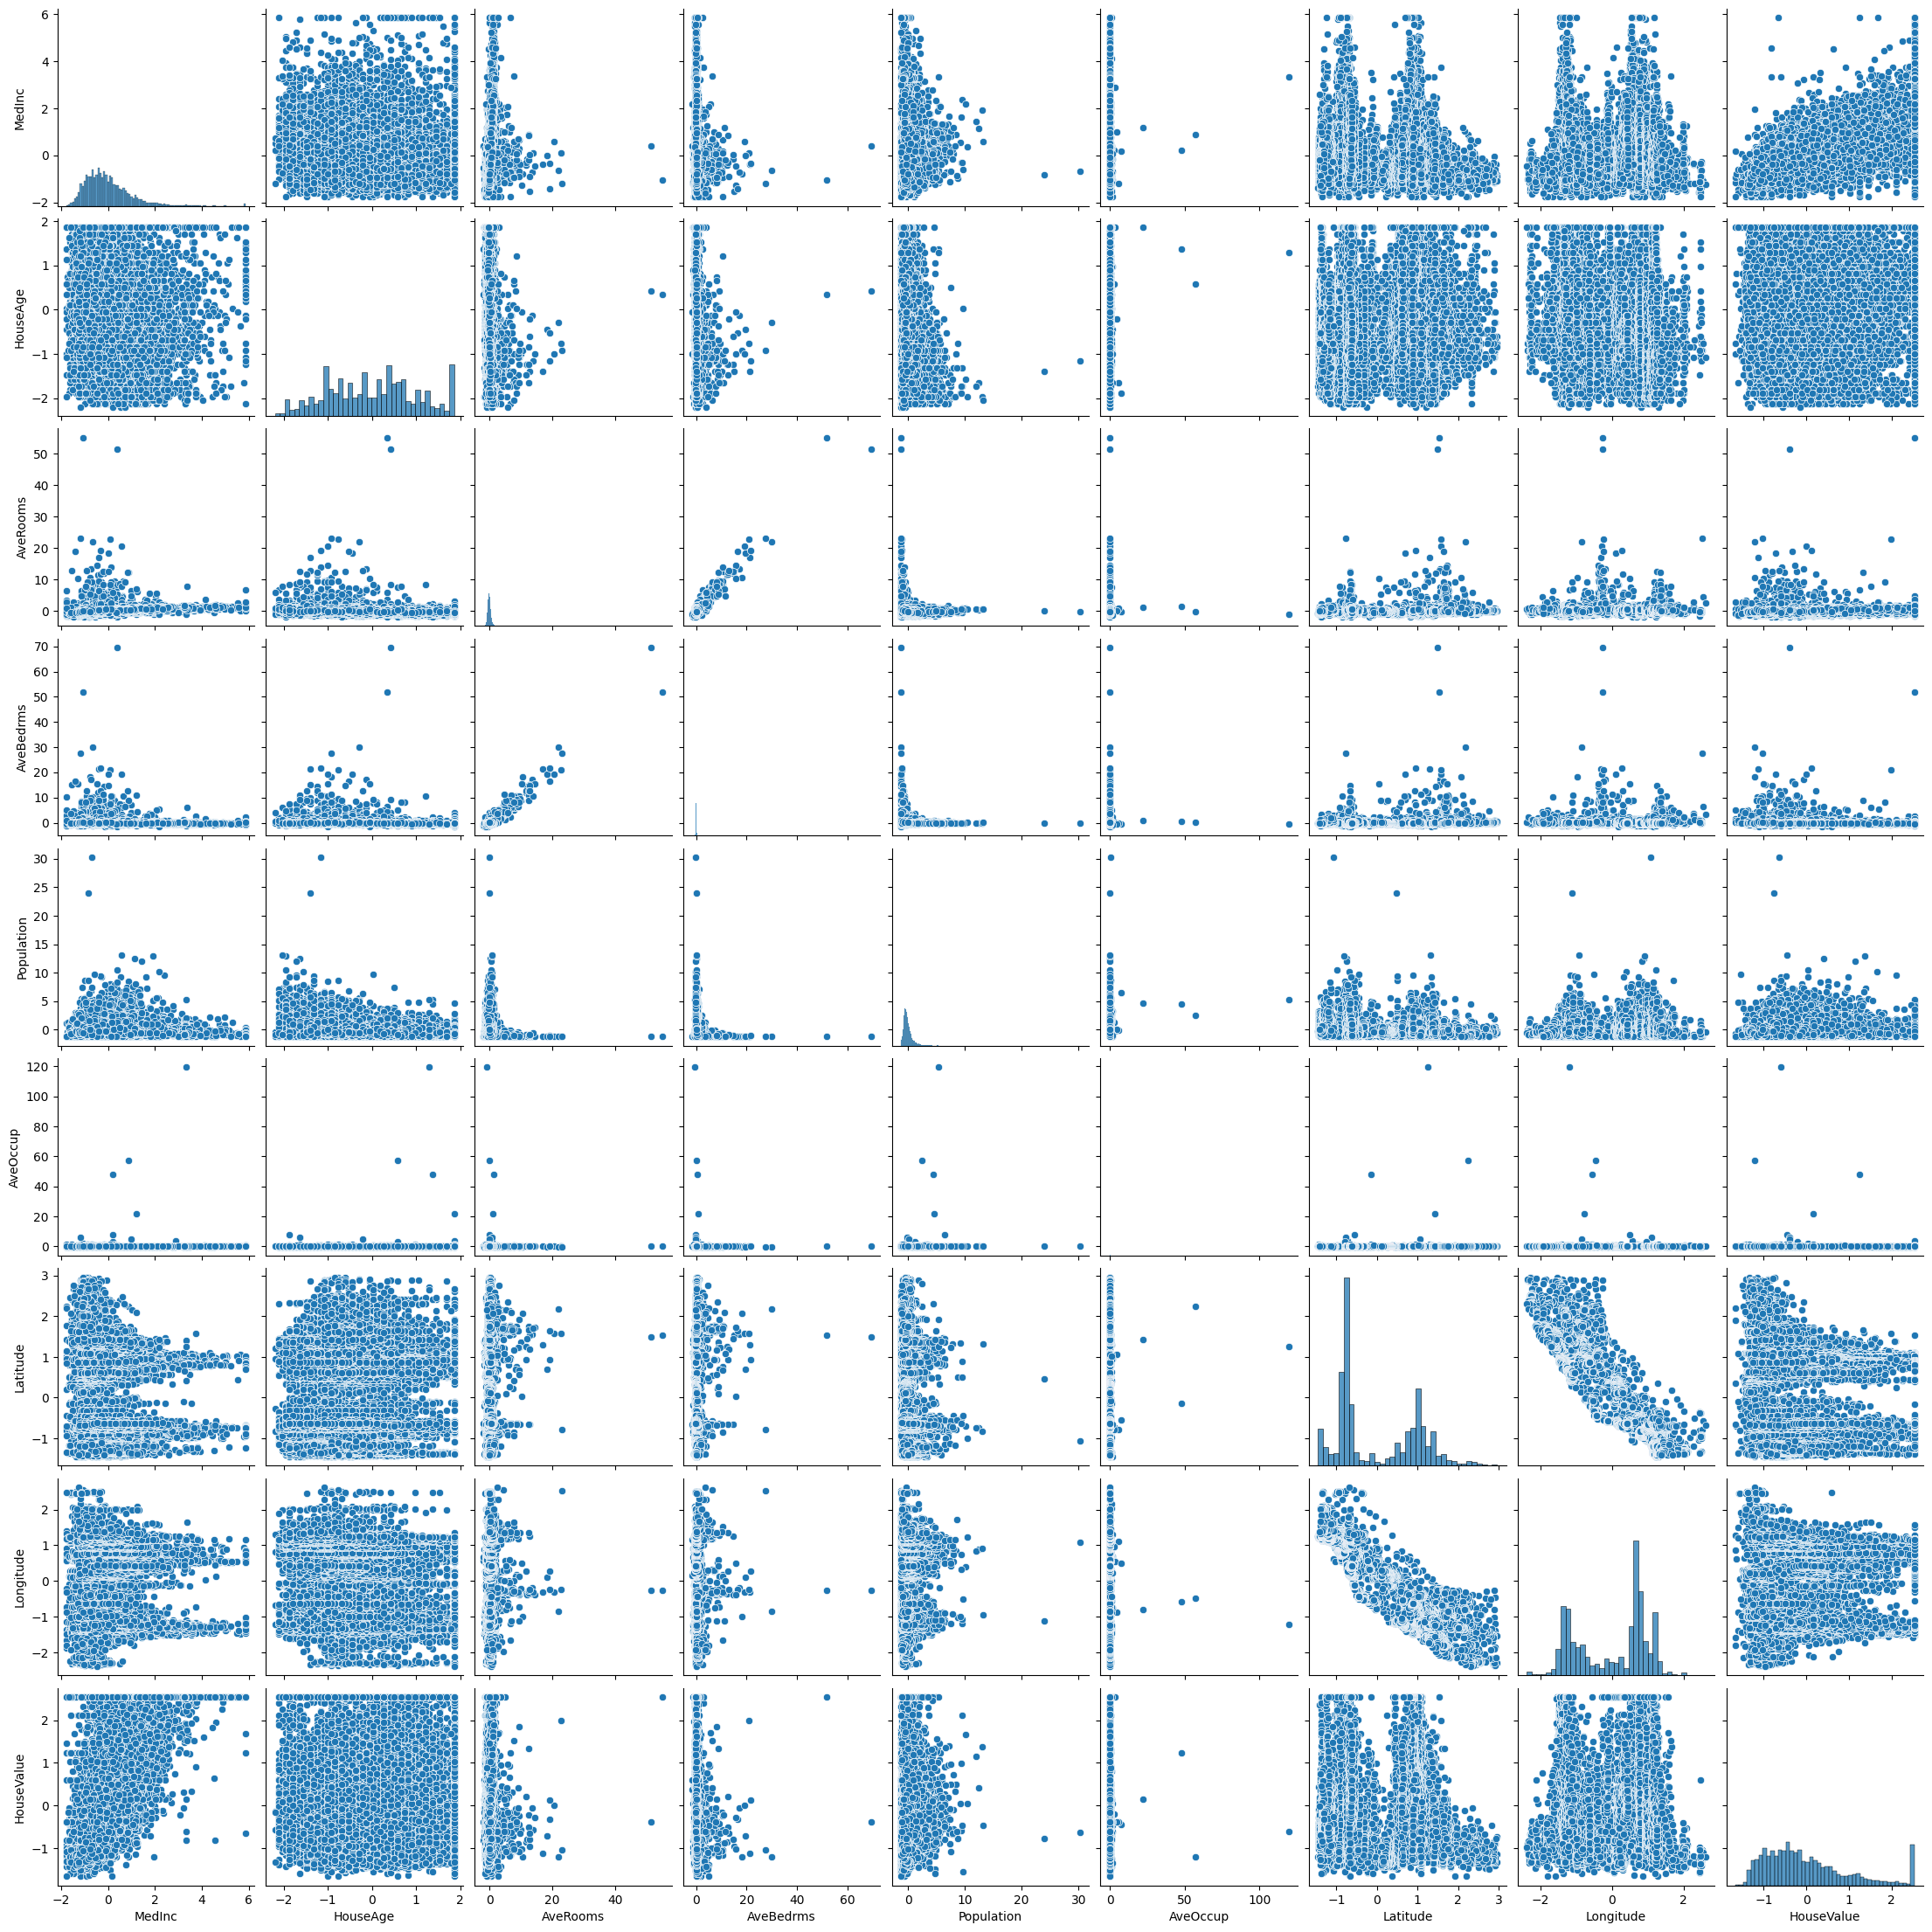

In [9]:
# plot the scaled data
sns.pairplot(california_df_scaled)
plt.show()

# Feature Selection

## KBest

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = california_df.drop('HouseValue', axis=1)
y = california_df['HouseValue']

# apply SelectKBest class to extract top 4 best features
kbest = SelectKBest(score_func=f_regression, k=4)
data = kbest.fit_transform(X, y)
# feature names
names = X.columns.values[kbest.get_support()]
data = pd.DataFrame(data, columns=names)
data

,MedInc,HouseAge,AveRooms,Latitude
0,8.3252,41.0,6.984127,37.88
1,8.3014,21.0,6.238137,37.86
2,7.2574,52.0,8.288136,37.85
3,5.6431,52.0,5.817352,37.85
4,3.8462,52.0,6.281853,37.85
...,...,...,...,...
20635,1.5603,25.0,5.045455,39.48
20636,2.5568,18.0,6.114035,39.49
20637,1.7000,17.0,5.205543,39.43
20638,1.8672,18.0,5.329513,39.43


## Feature Selection with the Scaled data

In [14]:
X = california_df_scaled.drop('HouseValue', axis=1)
y = california_df_scaled['HouseValue']

# apply SelectKBest class to extract top 4 best features
kbest = SelectKBest(score_func=f_regression, k=4)
data = kbest.fit_transform(X, y)
# feature names
names = X.columns.values[kbest.get_support()]
data = pd.DataFrame(data, columns=names)
data

,MedInc,HouseAge,AveRooms,Latitude
0,2.344766,0.982143,0.628559,1.052548
1,2.332238,-0.607019,0.327041,1.043185
2,1.782699,1.856182,1.155620,1.038503
3,0.932968,1.856182,0.156966,1.038503
4,-0.012881,1.856182,0.344711,1.038503
...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,1.801647
20636,-0.691593,-0.845393,0.276881,1.806329
20637,-1.142593,-0.924851,-0.090318,1.778237
20638,-1.054583,-0.845393,-0.040211,1.778237


## Variance Threshold

In [16]:
#check variance of features manually
variances = california_df.var()
variances

MedInc        3.609323e+00
HouseAge      1.583963e+02
AveRooms      6.121533e+00
AveBedrms     2.245915e-01
Population    1.282470e+06
AveOccup      1.078700e+02
Latitude      4.562293e+00
Longitude     4.014139e+00
HouseValue    1.331615e+00
dtype: float64

In [17]:
threshold = 0.5
variances > threshold

MedInc         True
HouseAge       True
AveRooms       True
AveBedrms     False
Population     True
AveOccup       True
Latitude       True
Longitude      True
HouseValue     True
dtype: bool

In [18]:
# on the scaled data
variances_scaled_data = california_df_scaled.var()
variances_scaled_data

MedInc        1.000048
HouseAge      1.000048
AveRooms      1.000048
AveBedrms     1.000048
Population    1.000048
AveOccup      1.000048
Latitude      1.000048
Longitude     1.000048
HouseValue    1.000048
dtype: float64

### VarianceThreshold on scaled data does not make sense as all the features will have variance of 1

In [20]:
from sklearn.feature_selection import VarianceThreshold

X = california_df.drop('HouseValue', axis=1)
selector = VarianceThreshold(threshold=0.5)
data = selector.fit_transform(X)
data = pd.DataFrame(data, columns=X.columns.values[selector.get_support()])
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32
